In [376]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

In [377]:
# LOADING THE DATASET INTO THE CODE

df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/TaxiFare.csv")

In [378]:
df.sample(5)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
25135,06:55.0,19.5,2013-09-20 09:06:55 UTC,-73.979207,40.785131,-73.992060,40.744853,1
24812,16:00.0,5.7,2011-12-04 10:16:00 UTC,-73.948852,40.788675,-73.938988,40.804753,1
49476,19:45.0,6.1,2011-10-15 18:19:45 UTC,-73.968502,40.800017,-73.973986,40.788273,1
32871,22:00.0,10.0,2014-06-28 19:22:00 UTC,-73.986837,40.756017,-73.989038,40.735240,1
5099,22:00.0,10.9,2009-06-23 14:22:00 UTC,-73.984797,40.754107,-73.956113,40.763798,1


In [379]:
df.shape

(50000, 8)

In [380]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [381]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [382]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [383]:
# NO MISSING VALUES IN THE DATA

In [384]:
corr=df.corr()
corr

<ipython-input-384-7d5195e2bf4d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
amount,1.000000,0.005944,-0.007338,0.004286,-0.005442,0.016583
longitude_of_pickup,0.005944,1.000000,-0.950588,0.956131,-0.946968,-0.005604
latitude_of_pickup,-0.007338,-0.950588,1.000000,-0.911123,0.928189,0.003237
longitude_of_dropoff,0.004286,0.956131,-0.911123,1.000000,-0.982117,-0.004936
latitude_of_dropoff,-0.005442,-0.946968,0.928189,-0.982117,1.000000,0.002958
no_of_passenger,0.016583,-0.005604,0.003237,-0.004936,0.002958,1.000000


<Axes: >

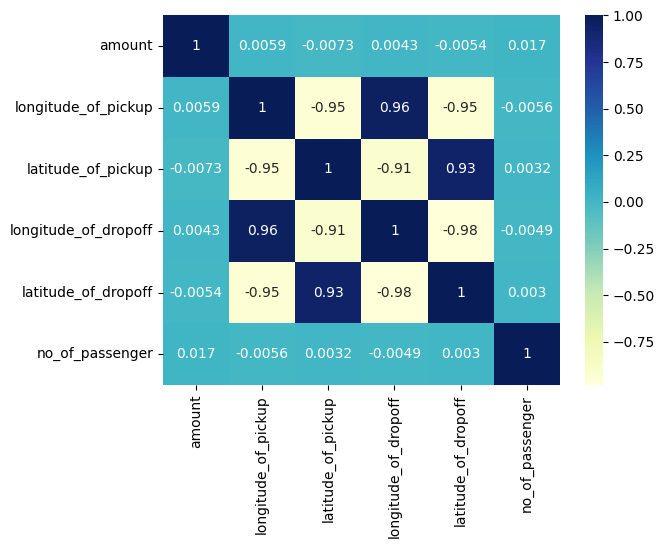

In [385]:
# PRINTING HEATMAP

sns.heatmap(corr,annot=True,cmap="YlGnBu")

<Axes: xlabel='longitude_of_pickup'>

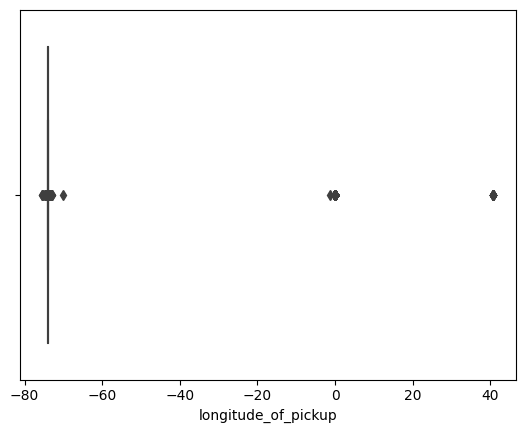

In [386]:
sns.boxplot(x='longitude_of_pickup',data=df)

<Axes: xlabel='latitude_of_pickup'>

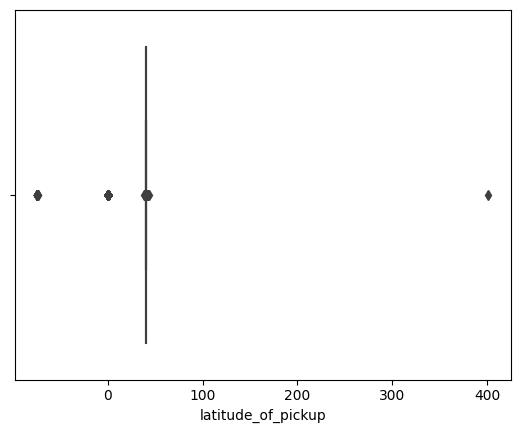

In [387]:
sns.boxplot(x='latitude_of_pickup',data=df)

<Axes: xlabel='latitude_of_dropoff'>

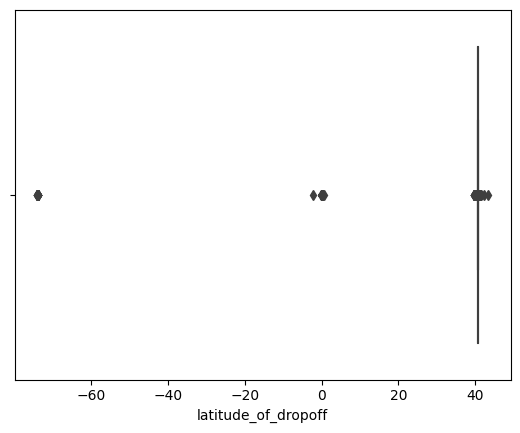

In [388]:
sns.boxplot(x='latitude_of_dropoff',data=df)

<Axes: xlabel='longitude_of_dropoff'>

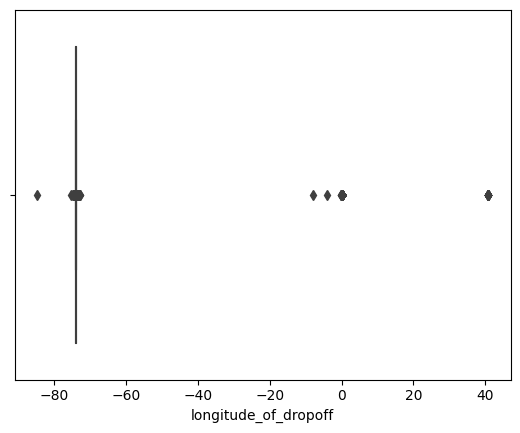

In [389]:
sns.boxplot(x='longitude_of_dropoff',data=df)

<Axes: xlabel='no_of_passenger'>

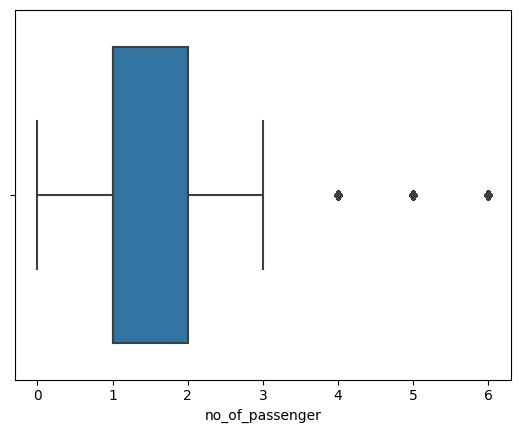

In [390]:
sns.boxplot(x='no_of_passenger',data=df)

In [391]:
# ALL THE OUTLIERS MUST BE REMOVED

col=['longitude_of_pickup','latitude_of_pickup','longitude_of_dropoff','latitude_of_dropoff']
Q1=df.longitude_of_pickup.quantile(0.25)
Q3=df.longitude_of_pickup.quantile(0.75)
IQR=Q3-Q1
print(Q1,Q3,IQR)

-73.992062 -73.96714800000001 0.02491399999999544


In [392]:
lowLim=Q1-1.5*IQR
highLim=Q3+1.5*IQR
lowLim,highLim

(-74.029433, -73.92977700000002)

In [393]:
df=df[(df.longitude_of_pickup>lowLim)]
df=df[(df.longitude_of_pickup<highLim)]

In [394]:
Q1=df.longitude_of_dropoff.quantile(0.25)
Q3=df.longitude_of_dropoff.quantile(0.75)
IQR=Q3-Q1
print(Q1,Q3,IQR)

-73.991518 -73.9665035 0.025014499999997497


In [395]:
lowLim=Q1-1.5*IQR
highLim=Q3+1.5*IQR
lowLim,highLim

(-74.02903975, -73.92898175)

In [396]:
df=df[(df.longitude_of_dropoff>lowLim)]
df=df[(df.longitude_of_dropoff<highLim)]

In [397]:
# df.describe()

In [398]:
Q1=df.latitude_of_dropoff.quantile(0.25)
Q3=df.latitude_of_dropoff.quantile(0.75)
IQR=Q3-Q1
print(Q1,Q3,IQR)

40.73666025 40.767944 0.031283750000000055


In [399]:
lowLim=Q1-1.5*IQR
highLim=Q3+1.5*IQR
lowLim,highLim

(40.689734625, 40.814869625)

In [400]:
df=df[(df.latitude_of_dropoff>lowLim)]
df=df[(df.latitude_of_dropoff<highLim)]

In [401]:
# df.describe()

In [402]:
Q1=df.latitude_of_pickup.quantile(0.25)
Q3=df.latitude_of_pickup.quantile(0.75)
IQR=Q3-Q1
print(Q1,Q3,IQR)

40.737744594999995 40.76695825 0.02921365500000661


In [403]:
lowLim=Q1-1.5*IQR
highLim=Q3+1.5*IQR
lowLim,highLim

(40.693924112499985, 40.81077873250001)

In [404]:
df=df[(df.latitude_of_pickup>lowLim)]
df=df[(df.latitude_of_pickup<highLim)]

In [405]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,42481.000000,42481.000000,42481.000000,42481.000000,42481.000000,42481.000000
mean,8.987509,-73.981913,40.752708,-73.980774,40.753166,1.664132
std,4.794282,0.016168,0.021288,0.016957,0.022647,1.286573
min,-5.000000,-74.029008,40.693960,-74.029008,40.689745,0.000000
25%,5.700000,-73.992910,40.738140,-73.992057,40.738278,1.000000
50%,7.800000,-73.982827,40.753567,-73.981958,40.754402,1.000000
75%,11.000000,-73.971512,40.766808,-73.970370,40.767663,2.000000
max,128.610000,-73.929810,40.810732,-73.929015,40.814842,6.000000


In [406]:
# THE "amount" AND "number of passengers" COLUMNS ARE SPECIAL CASES

df=df[(df.no_of_passenger>0)]     #Number of passengers cann't be 0

Q1=df.amount.quantile(0.25)
Q3=df.amount.quantile(0.75)
IQR=Q3-Q1
print(Q1,Q3,IQR)

5.7 11.0 5.3


In [407]:
lowLim=0.5               #taking the lower threshold as 0.5, Q1-1.5*IQR is coming to be -ve
highLim=Q3+1.5*IQR
lowLim,highLim

(0.5, 18.95)

In [408]:
df=df[(df.amount>lowLim)]
df=df[(df.amount<highLim)]

In [409]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,40712.000000,40712.000000,40712.000000,40712.000000,40712.000000,40712.000000
mean,8.399672,-73.981857,40.752872,-73.980784,40.753477,1.668599
std,3.494987,0.016001,0.020993,0.016689,0.022130,1.283410
min,2.500000,-74.029008,40.693985,-74.029008,40.689745,1.000000
25%,5.700000,-73.992719,40.738503,-73.991900,40.738925,1.000000
50%,7.700000,-73.982790,40.753687,-73.981932,40.754649,1.000000
75%,10.500000,-73.971600,40.766743,-73.970592,40.767610,2.000000
max,18.900000,-73.929878,40.810732,-73.929015,40.814842,6.000000


In [410]:
# DUPLICATES IN THE DATASET MUST BE REMOVED

In [411]:
df.drop_duplicates(inplace=True)

In [412]:
column=['date_time_of_pickup','unique_id']
df.drop(column,axis=1,inplace=True)

In [413]:
df.dtypes

amount                  float64
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [414]:
# NO OBJECT TYPE DATA SO NO NEED FOR ENCODING

In [415]:
# THE DATA IS DIVIDED INTO DEPENDENT AND INDEPENDENT VARIABLES. x CONTAONS THE INDEPENDENT VARIABLES AND y CONTAINS THE DEPENDENT VARIABLES
# THE DATA IS DIVIDED INTO TEST AND TRAIN SETS. THE SUBSCRIPT "ns" DENOTES THAT THE DATA IS NON STANDARD

In [416]:
x_ns=df.drop(['amount'],axis=1)
y_ns=df['amount']

In [417]:
xtrain_ns, xtest_ns, ytrain_ns, ytest_ns=train_test_split(x_ns,y_ns,test_size=0.2)
xtrain_ns.shape

(32569, 5)

In [418]:
xtest_ns.shape

(8143, 5)

In [419]:
# APPLYING LINEAR REGRESSION ON NON STANDARD DATA

model1=LinearRegression(n_jobs=10)
model1.fit(xtrain_ns,ytrain_ns)

LinearRegression(n_jobs=10)

In [420]:
model1.score(xtrain_ns,ytrain_ns)


0.012816673644865273

In [421]:
model1.score(xtest_ns,ytest_ns)

0.011797623359991016

In [422]:
# THE DATASET IS STANDARDISED FOR BETTER MODELLING

df_std=df
model_std=StandardScaler()
model_std.fit_transform(df_std)

array([[ 2.43217866, -2.13682949, -1.98019065,  0.09084735,  1.28910583,
        -0.52096158],
       [-0.77245068, -0.05505467,  0.40005771, -0.62664514, -0.13171494,
         0.2582224 ],
       [-0.20019544, -0.32954146, -0.93981152, -0.64611943,  0.20855541,
        -0.52096158],
       ...,
       [-0.42909753, -1.30249464, -0.6404167 , -1.03806183,  0.27141279,
        -0.52096158],
       [-1.11580382,  2.23708502,  1.17638823,  1.63788437,  1.18440378,
         0.2582224 ],
       [ 0.71541294,  3.07823204,  0.520816  ,  2.88705474,  0.46671803,
        -0.52096158]])

In [423]:
x=df_std.drop(['amount'],axis=1)
y=df_std['amount']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [424]:
# LINEAR REGRESSION

model2=LinearRegression(n_jobs=15)
model2.fit(x_train,y_train)


LinearRegression(n_jobs=15)

In [425]:
model2.score(x_train,y_train)


0.013068912419389123

In [426]:
model2.score(x_test,y_test)


0.010271206065982752

In [427]:
df.sample(5)

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
28551,4.5,-74.005993,40.736005,-74.002841,40.739425,1
14951,4.1,-74.002492,40.739457,-73.997322,40.737903,1
31366,12.5,-73.960817,40.769052,-73.992747,40.748915,1
6962,18.5,-73.982445,40.753799,-73.965050,40.806301,2
10761,8.0,-74.001137,40.736665,-73.985900,40.734922,1


In [428]:
# WE ARE GETTING NEGATIVE SCORE BECAUSE OF THE UNEVEN NEGEATIVE VALUES IN THE DATASET

df['longitude_of_pickup']=abs(df['longitude_of_pickup']-df['longitude_of_dropoff'])
df['latitude_of_pickup']=abs(df['latitude_of_pickup']-df['latitude_of_dropoff'])
col=['longitude_of_dropoff','latitude_of_dropoff']
df.drop(col,axis=1,inplace=True)

In [429]:
df.sample(5)

,amount,longitude_of_pickup,latitude_of_pickup,no_of_passenger
21802,7.0,0.013037,0.016990,6
2458,5.5,0.009706,0.013363,2
48189,9.7,0.027602,0.003248,2
33027,3.7,0.004940,0.006777,1
6393,11.3,0.031210,0.030203,2


In [430]:
df.rename(columns={'latitude_of_pickup': 'Latitude_change'}, inplace=True)
df.rename(columns={'longitude_of_pickup': 'Longitude_change'}, inplace=True)

In [431]:
df.sample(5)

,amount,Longitude_change,Latitude_change,no_of_passenger
31753,4.5,0.004852,0.010994,1
13201,7.5,0.015634,0.003102,1
48267,8.5,0.006609,0.017441,1
40593,15.5,0.022804,0.039993,1
792,15.0,0.026654,0.030115,1


In [432]:
# STANDARDISING THE DATASET AGAIN BECAUSE THE VALUES HAVE BEEN ALTERED

model_std=StandardScaler()
model_std.fit_transform(df)

array([[ 2.43217866,  2.1473625 ,  4.18440367, -0.52096158],
       [-0.77245068, -0.47570474, -0.41459465,  0.2582224 ],
       [-0.20019544, -0.85298634,  0.67710496, -0.52096158],
       ...,
       [-0.42909753, -0.83879306,  0.30193623, -0.52096158],
       [-1.11580382, -0.57923223, -1.07294142,  0.2582224 ],
       [ 0.71541294, -1.26459157, -1.23545832, -0.52096158]])

In [433]:
x=df.drop(['amount'],axis=1)
y=df['amount']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [434]:
# APPLYING LINEAR REGRESSION

model4=LinearRegression(n_jobs=7)
model4.fit(x_train,y_train)

LinearRegression(n_jobs=7)

In [435]:
model4.score(x_train,y_train)


0.605369398217865

In [436]:
model4.score(x_test,y_test)


0.5998631213979874

In [437]:
# DECISION TREE REGRESSOR

model5=DecisionTreeRegressor(max_depth=6,min_samples_leaf=5)
model5.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=6, min_samples_leaf=5)

In [438]:
model5.score(x_train,y_train)


0.6737825802565229

In [439]:
model5.score(x_test,y_test)


0.6637110880586943

In [440]:
# BAGGING REGRESSOR

model6=BaggingRegressor(n_estimators=5,max_samples=25)
model6.fit(x_train,y_train)

BaggingRegressor(max_samples=25, n_estimators=5)

In [441]:
model6.score(x_train,y_train)

0.5359195373310799

In [442]:
model6.score(x_test,y_test)

0.5340437626433683

In [443]:
# ADABOOST REGRESSOR

model7=AdaBoostRegressor(n_estimators=1,learning_rate=10,loss='exponential',random_state=0)
model7.fit(x_train,y_train)

AdaBoostRegressor(learning_rate=10, loss='exponential', n_estimators=1,
                  random_state=0)

In [444]:
model7.score(x_train,y_train)

0.6200209738022182

In [445]:
model7.score(x_test,y_test)

0.6225224420813587

In [446]:
# GRADIENT BOOST REGRESSOR

model8=GradientBoostingRegressor(n_estimators=550)
model8.fit(x_train,y_train)

GradientBoostingRegressor(n_estimators=550)

In [447]:
model8.score(x_train,y_train)

0.7034605379069101

In [448]:
model8.score(x_test,y_test)


0.6713925863937357

In [449]:
# RANDOM FOREST REGRESSOR

model9=RandomForestRegressor(max_depth=5)
model9.fit(x_train,y_train)

RandomForestRegressor(max_depth=5)

In [450]:
model9.score(x_train,y_train)

0.671608941912345

In [451]:
model9.score(x_test,y_test)

0.6676406642903737

In [452]:
# In taxi fare prediction, the values to be predicted are within the domain of real numbers, unlike that of h1n1 prediciton
# Thus, we prefer to use Regressors for our purpose

# The best fitting model is observed to be the Gradient Boost Regressor, with scores of 0.706 and 0.664
# This is because gradient boosting is a tree based regressor which improve its previous error.
# Decision Tree Regressor gave us the second best scores, which are 0.67 and 0.65 for train and test models respectively.